In [1]:
DATA_DIR = 'airbus-ship-detection'
TEST_DIR = DATA_DIR + '/test_v2/'

In [2]:
import tensorflow as tf
import cv2
from tensorflow import keras
from matplotlib import pyplot as plt
import os
import numpy as np
from keras.utils import custom_object_scope
from utils import FocalLoss, dice_coef
%matplotlib inline

In [ ]:
all_imgs = os.listdir(TEST_DIR)
test_imgs = ['00dc34840.jpg', '00c3db267.jpg', '00aa79c47.jpg', '00a3a9d72.jpg']

In [13]:
IMG_SCALING = (3, 3)

def gen_pred(test_dir, img, model):
    rgb_path = os.path.join(TEST_DIR,img)
    img = cv2.imread(rgb_path)
    img = img[::IMG_SCALING[0], ::IMG_SCALING[1]]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = np.squeeze(pred, axis=0)
    return cv2.imread(rgb_path), pred

In [11]:
with custom_object_scope({'FocalLoss': FocalLoss, 'dice_coef': dice_coef}):
    fullres_model = keras.models.load_model('fullres_model.keras')

1/1 [==============================] - 0s 66ms/step


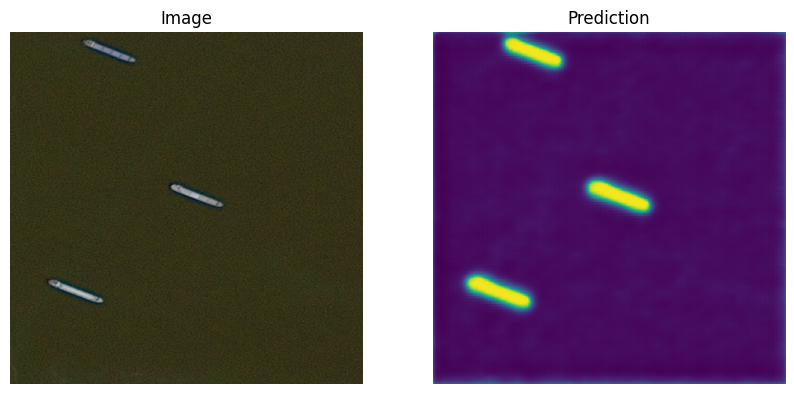

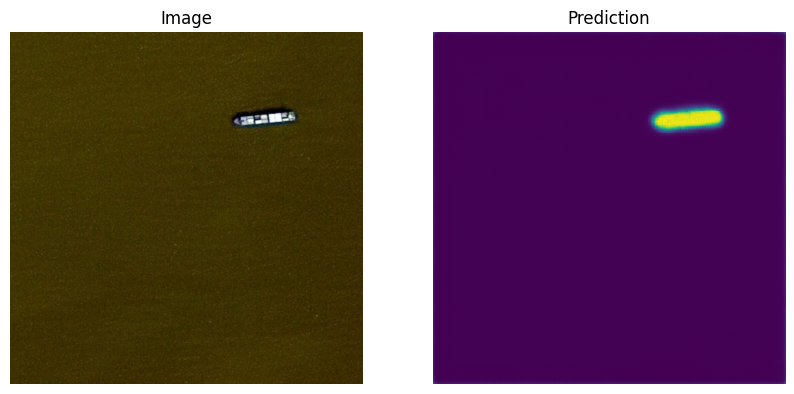

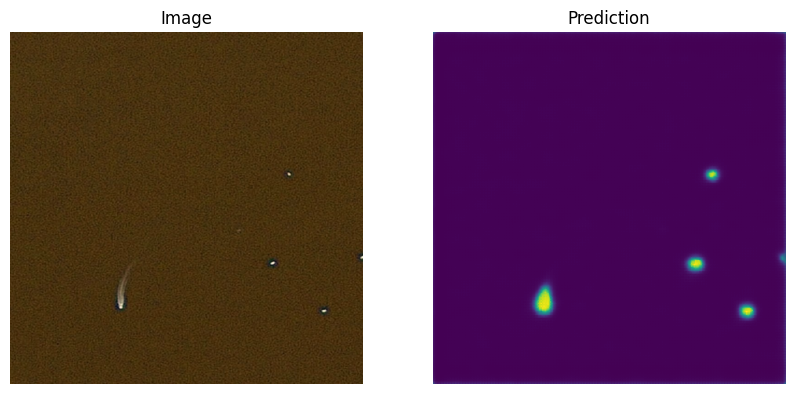

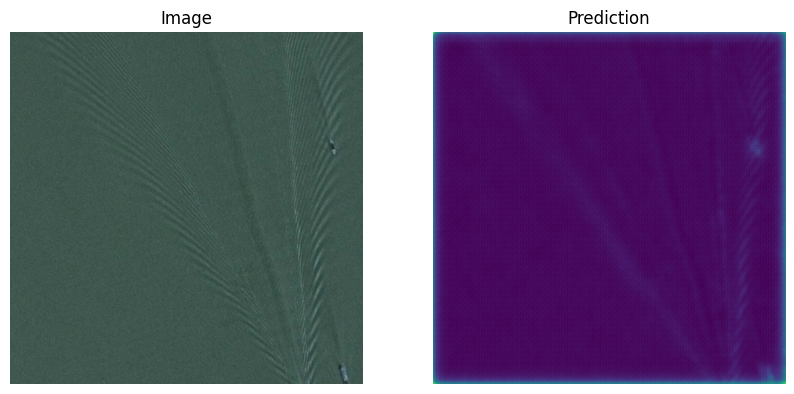

In [14]:
rows = 1
columns = 2
for i in range(len(test_imgs)):
    img, pred = gen_pred(TEST_DIR, test_imgs[i], fullres_model)
    fig = plt.figure(figsize=(10, 7))
    fig.add_subplot(rows, columns, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Image")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(pred, interpolation=None)
    plt.axis('off')
    plt.title("Prediction")